In [1]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle as pkl

# algo and estimators
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('../../datasets/50_startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [6]:
state_hot_encoder = OneHotEncoder(drop='first')
state_dummies = state_hot_encoder.fit_transform(df[['State']]).toarray()


In [7]:
# convert into dataframe for better readablity
dummydf = pd.DataFrame(data = state_dummies,columns = ['Florida','New York'])

In [8]:
df = pd.concat([df,dummydf],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [9]:
df.drop(labels='State',axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [10]:
print(df.columns.tolist())

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida', 'New York']


In [11]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York']]
y = df['Profit']

In [12]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size=.2,random_state=0)

In [13]:
model = LinearRegression()
model.fit(trainx,trainy)
score = model.score(testx,testy) * 100
print(f'the achieved score = {score}')

the achieved score = 93.47068473282424


In [14]:
model.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [15]:
model.intercept_

42554.16761773237

In [16]:
ypred = model.predict(x)

In [17]:
df['Predicted_Profit'] = ypred

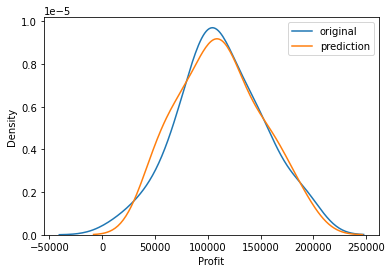

In [18]:
sns.distplot(y,hist=False,label='original')
sns.distplot(ypred,hist=False,label='prediction')
plt.legend()
plt.show()

In [19]:
def save_model(path,model):
    with open(path,'wb') as f:
        pkl.dump(model,f)
    return path

In [20]:
save_model('../../models/startup_profit_prediction.pkl',model)
save_model('../../models/state_hot_encoder.pkl',state_hot_encoder)

'../../models/state_hot_encoder.pkl'

In [21]:

def load_model(path):
    with open(path,'rb') as f:
       return pkl.load(f)

encoder = load_model('../../models/state_hot_encoder.pkl')
model = load_model('../../models/startup_profit_prediction.pkl')

rnd = int(input('enter R&D spend: '))
admin = int(input('enter admin spend: '))
mkt = int(input('enter marketing spend: '))
state = input("select state (California,Florida,New York): ")



In [22]:
state_dummies = encoder.transform([[state]]).toarray()

In [23]:
encoder.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [24]:
data = np.array([[rnd,admin,mkt]])
input_data = np.append(data,state_dummies)

In [25]:
input_data

array([1.23546e+05, 1.25462e+05, 1.25426e+05, 0.00000e+00, 1.00000e+00])

In [26]:
profit = model.predict(input_data.reshape(-1,1))
print(profit)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [103]:
model.predict(trainx)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [105]:
model.intercept_

1.4551915228366852e-11

In [106]:
model.coef_

array([ 1.63489405e-16, -3.33066907e-16,  2.77555756e-16,  1.00000000e+00,
       -4.33251635e-13,  4.14823624e-14])